In [ ]:
# !pip install prince

In [147]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 차원축소
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
import prince


In [148]:
data = pd.read_csv('./data_to_model/data_with_winsorized_merged_age_0.01.csv', index_col=0)
data.fillna(0, inplace=True)
data.head(3)

,2023년09월_전체세대,2023년09월_1인세대,2023년09월_2인세대,2023년09월_3인세대,2023년09월_4인세대,2023년09월_5인세대,2023년9월_6인가구이상,채소가게수,제로웨이스트 가게수,유치원수,...,승하차인원_버스_지하철,1점포당_1년_매출액,남자_10대이하,남자_20_30대,남자_40_60대,남자_70대이상,여자_10대이하,여자_20_30대,여자_40_60대,여자_70대이상
가락1동,9836,1633,2492,2706,2438,449,118,10,0,1,...,184724,117503246,5858,7050,11634,2168,5478,7960,12672,2248
가락2동,12375,3568,2746,2825,2641,453,142,3,0,4,...,190052,33727171,5642,8430,13974,2532,5064,8934,15214,2864
가락본동,11667,4854,2640,2123,1567,385,98,9,2,2,...,273627,30568803,3080,8154,11626,2280,2990,8068,12022,2622


In [149]:
df = data.copy()
df.columns

Index(['2023년09월_전체세대', '2023년09월_1인세대', '2023년09월_2인세대', '2023년09월_3인세대',
       '2023년09월_4인세대', '2023년09월_5인세대', '2023년9월_6인가구이상', '채소가게수',
       '제로웨이스트 가게수', '유치원수', '거주인구대비취약자수', '거주인구대비취약자백분위수', '미세먼지지수',
       '미세먼지백분위', '행정구역면적', '공원수', '공원율', '도시농업(프로그램수)', '도시농업(시설수)', '초등학교수',
       '사업체수 (개)', '종사자수 (명)', '채식식당수', '인구수', '카페수', '승하차인원_버스_지하철',
       '1점포당_1년_매출액', '남자_10대이하', '남자_20_30대', '남자_40_60대', '남자_70대이상',
       '여자_10대이하', '여자_20_30대', '여자_40_60대', '여자_70대이상'],
      dtype='object')

In [150]:
# 유치원, 초등학교 수 합치기
df['유치원_초등학교'] = df['유치원수'] + df['초등학교수']

In [151]:
df.columns

Index(['2023년09월_전체세대', '2023년09월_1인세대', '2023년09월_2인세대', '2023년09월_3인세대',
       '2023년09월_4인세대', '2023년09월_5인세대', '2023년9월_6인가구이상', '채소가게수',
       '제로웨이스트 가게수', '유치원수', '거주인구대비취약자수', '거주인구대비취약자백분위수', '미세먼지지수',
       '미세먼지백분위', '행정구역면적', '공원수', '공원율', '도시농업(프로그램수)', '도시농업(시설수)', '초등학교수',
       '사업체수 (개)', '종사자수 (명)', '채식식당수', '인구수', '카페수', '승하차인원_버스_지하철',
       '1점포당_1년_매출액', '남자_10대이하', '남자_20_30대', '남자_40_60대', '남자_70대이상',
       '여자_10대이하', '여자_20_30대', '여자_40_60대', '여자_70대이상', '유치원_초등학교'],
      dtype='object')

In [31]:
# population_feature = ['2023년09월_1인세대', '남자_10대이하', '남자_20_30대', '남자_40_60대', '남자_70대이상', '여자_10대이하',
#        '여자_20_30대', '여자_40_60대', '여자_70대이상']

# # infra_feature = ['공원수', '공원율', '도시농업(프로그램수)', '도시농업(시설수)']
# # demand_feature = ['채소가게수', '카페수', '채식식당수', '초등학교수', '유치원수']
# environ_featrue = ['미세먼지지수', '미세먼지백분위', '거주인구대비취약자수', '공원수', '공원율', '도시농업(프로그램수)', '도시농업(시설수)']

# market_feature = ['1점포당_1년_매출액', '승하차인원_버스_지하철', '종사자수 (명)', '사업체수 (개)', '채소가게수', '카페수', '채식식당수', '초등학교수', '유치원수']

In [152]:
population_feature = ['2023년09월_1인세대', '남자_10대이하', '남자_20_30대', '남자_40_60대', '남자_70대이상', '여자_10대이하',
       '여자_20_30대', '여자_40_60대', '여자_70대이상']

# infra_feature = ['공원수', '공원율', '도시농업(프로그램수)', '도시농업(시설수)']
# demand_feature = ['채소가게수', '카페수', '채식식당수', '초등학교수', '유치원수']
environ_featrue = ['미세먼지지수',  '공원수', '도시농업(프로그램수)']

market_feature = ['1점포당_1년_매출액', '승하차인원_버스_지하철', '카페수', '유치원_초등학교']

In [32]:
# # 인구 합치기 전, 스케일링
# scaled_data2 = StandardScaler().fit_transform(np.log1p(data))
# data_scale_log2=pd.DataFrame(data=scaled_data2, columns=data.columns)

In [33]:
# # 인구 합친 후, 스케일링 (로그, 스탠다드)
# scale_kind = 'standard_log'
# scaled_data = StandardScaler().fit_transform(np.log1p(df))
# data_scale_log=pd.DataFrame(data=scaled_data, columns=df.columns)
# data_scale_log.head(5)

In [153]:
# 인구 합친 후, 스케일링 (min-max)
scale_kind = 'min_max'
scaled_data = MinMaxScaler().fit_transform(df)
data_scale_log=pd.DataFrame(data=scaled_data, columns=df.columns)
data_scale_log.head()

,2023년09월_전체세대,2023년09월_1인세대,2023년09월_2인세대,2023년09월_3인세대,2023년09월_4인세대,2023년09월_5인세대,2023년9월_6인가구이상,채소가게수,제로웨이스트 가게수,유치원수,...,1점포당_1년_매출액,남자_10대이하,남자_20_30대,남자_40_60대,남자_70대이상,여자_10대이하,여자_20_30대,여자_40_60대,여자_70대이상,유치원_초등학교
0,0.393810,0.071975,0.474883,0.696986,0.618096,0.524909,0.539216,0.6250,0.000000,0.142857,...,0.574693,0.644969,0.412211,0.568037,0.440407,0.603722,0.433670,0.567350,0.308844,0.272727
1,0.512688,0.202993,0.528948,0.729297,0.671489,0.529769,0.656863,0.1875,0.000000,0.571429,...,0.154381,0.620215,0.500997,0.694292,0.528585,0.556168,0.492189,0.692044,0.416086,0.545455
2,0.479539,0.290067,0.506386,0.538691,0.389006,0.447145,0.441176,0.5625,0.285714,0.285714,...,0.138535,0.326610,0.483240,0.567605,0.467539,0.317942,0.440159,0.535466,0.373955,0.363636
3,0.218700,0.262983,0.154534,0.071952,0.032088,0.021871,0.000000,0.3125,0.000000,0.000000,...,0.028524,0.000000,0.071479,0.031995,0.115310,0.000000,0.035689,0.007358,0.077820,0.090909
4,0.778912,0.914754,0.424223,0.232691,0.126512,0.130012,0.147059,0.4375,0.000000,0.142857,...,0.343168,0.118038,0.864119,0.450092,0.326550,0.117161,0.726989,0.282841,0.240599,0.090909


In [127]:
data_scale_log

,2023년09월_전체세대,2023년09월_1인세대,2023년09월_2인세대,2023년09월_3인세대,2023년09월_4인세대,2023년09월_5인세대,2023년9월_6인가구이상,채소가게수,제로웨이스트 가게수,유치원수,...,1점포당_1년_매출액,남자_10대이하,남자_20_30대,남자_40_60대,남자_70대이상,여자_10대이하,여자_20_30대,여자_40_60대,여자_70대이상,유치원_초등학교
0,0.393810,0.071975,0.474883,0.696986,0.618096,0.524909,0.539216,0.6250,0.000000,0.142857,...,0.574693,0.644969,0.412211,0.568037,0.440407,0.603722,0.433670,0.567350,0.308844,0.272727
1,0.512688,0.202993,0.528948,0.729297,0.671489,0.529769,0.656863,0.1875,0.000000,0.571429,...,0.154381,0.620215,0.500997,0.694292,0.528585,0.556168,0.492189,0.692044,0.416086,0.545455
2,0.479539,0.290067,0.506386,0.538691,0.389006,0.447145,0.441176,0.5625,0.285714,0.285714,...,0.138535,0.326610,0.483240,0.567605,0.467539,0.317942,0.440159,0.535466,0.373955,0.363636
3,0.218700,0.262983,0.154534,0.071952,0.032088,0.021871,0.000000,0.3125,0.000000,0.000000,...,0.028524,0.000000,0.071479,0.031995,0.115310,0.000000,0.035689,0.007358,0.077820,0.090909
4,0.778912,0.914754,0.424223,0.232691,0.126512,0.130012,0.147059,0.4375,0.000000,0.142857,...,0.343168,0.118038,0.864119,0.450092,0.326550,0.117161,0.726989,0.282841,0.240599,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.154462,0.080236,0.196467,0.198208,0.162546,0.157959,0.269608,0.0625,0.000000,0.000000,...,0.277411,0.148292,0.178151,0.177727,0.127422,0.138295,0.184571,0.179143,0.144499,0.090909
422,0.320723,0.249171,0.328012,0.283465,0.175697,0.239368,0.303922,0.0000,0.142857,0.142857,...,0.151037,0.198029,0.289841,0.316499,0.296512,0.175971,0.250300,0.315707,0.342270,0.272727
423,0.296938,0.276322,0.227118,0.203367,0.158601,0.177400,0.186275,0.0000,0.000000,0.142857,...,0.149995,0.146688,0.299363,0.211287,0.226260,0.153687,0.337058,0.193760,0.217967,0.090909
424,0.531276,0.426637,0.467859,0.425197,0.328248,0.371810,0.343137,0.0625,0.000000,0.428571,...,0.085220,0.313087,0.563533,0.457537,0.493702,0.316793,0.464552,0.430295,0.468315,0.454545


In [35]:
# # 인구 합친 후, 스케일링 (log, min-max)
# scaled_data = MinMaxScaler().fit_transform(np.log1p(df))
# data_scale_log=pd.DataFrame(data=scaled_data, columns=df.columns)
# data_scale_log.head()

#### 인구특성



In [136]:
population_feature = ['2023년09월_1인세대', '남자_10대이하', '남자_20_30대', '남자_40_60대', '남자_70대이상', '여자_10대이하',
       '여자_20_30대', '여자_40_60대', '여자_70대이상']

pca = PCA(n_components=0.9)
population_scale_data = data_scale_log[population_feature]
pca.fit(population_scale_data)
pca_population = pd.DataFrame((pca.transform(population_scale_data)))

num_of_principal = pca_population.shape[1] 
print('주성분의 개수:', num_of_principal)

주성분의 개수: 3


In [145]:
pca_weight_PC1 = pd.DataFrame(pca.components_).iloc[0]
data_scale_log[population_feature].values.dot(pca_weight_PC1.values)

array([1.38047751, 1.60175027, 1.2859182 , 0.16940775, 1.23474736,
       1.62876958, 0.78591433, 0.77835027, 0.09239021, 0.7548672 ,
       1.50772272, 0.84207742, 0.96796191, 0.87283903, 0.51969377,
       0.06846715, 0.93772359, 0.38357445, 0.52947846, 0.5778997 ,
       1.25709957, 0.53079372, 0.50360884, 0.70019201, 0.7473794 ,
       1.99396528, 2.02498671, 2.22400049, 1.5838185 , 1.75671938,
       0.19774595, 0.41907515, 0.49701883, 0.67768069, 0.66268099,
       0.53661909, 0.83316714, 1.76857993, 1.17355006, 1.36884653,
       1.44945395, 0.97987707, 0.73283147, 1.14554538, 0.6892877 ,
       1.23568038, 1.85637707, 1.10010461, 0.84495145, 1.45345589,
       0.74590112, 0.8083759 , 1.60628218, 0.29662763, 0.89052531,
       0.90686858, 1.78139377, 0.50602292, 2.06785013, 0.51451093,
       0.48778805, 0.48611477, 0.66744792, 1.46200116, 1.53882955,
       1.06659793, 1.93386908, 0.73644547, 0.62656153, 1.18389863,
       1.94931533, 1.51284902, 0.52903458, 0.93294654, 0.40748

In [37]:
print('주성분의 설명력')
for i in range(num_of_principal) :
    print(f"제 {i+1}주성분 :", pca.explained_variance_ratio_[i])
    
pd.DataFrame(data=pca.components_,columns=population_scale_data.columns).T

주성분의 설명력
제 1주성분 : 0.715204031179238
제 2주성분 : 0.171534454958467
제 3주성분 : 0.08620742394039464


,0,1,2
2023년09월_1인세대,0.183388,0.627267,0.107060
남자_10대이하,0.301382,-0.395109,0.338017
남자_20_30대,0.307718,0.372915,0.230206
남자_40_60대,0.404274,-0.113809,0.012924
남자_70대이상,0.378419,0.011398,-0.527848
여자_10대이하,0.293668,-0.377576,0.335234
여자_20_30대,0.309602,0.353454,0.338989
여자_40_60대,0.395655,-0.175381,0.013739
여자_70대이상,0.368200,0.004975,-0.561260


In [38]:
population_column = ['연령대가 다양한 거주지역', '1인 세대 및 20~30대 남녀가 많은 지역', '어린이 및 청년 세대가 많은 지역']

---

### 환경 관련 인프라 특성

In [39]:
environ_feature = ['미세먼지지수', '미세먼지백분위', '거주인구대비취약자수', '공원수', '도시농업(프로그램수)', '도시농업(시설수)']

pca = PCA(n_components=0.9)
environ_scale_data = data_scale_log[environ_feature]
pca.fit(environ_scale_data)
pca_environ = pd.DataFrame((pca.transform(environ_scale_data)))

num_of_principal = pca_environ.shape[1] 
print('주성분의 개수:', num_of_principal)

주성분의 개수: 3


In [40]:
print('주성분의 설명력')
for i in range(num_of_principal) :
    print(f"제 {i+1}주성분 :", pca.explained_variance_ratio_[i])
    
pd.DataFrame(data=pca.components_,columns=environ_scale_data.columns).T

주성분의 설명력
제 1주성분 : 0.3736740351805766
제 2주성분 : 0.3258769263609912
제 3주성분 : 0.2014762964513425


,0,1,2
미세먼지지수,0.121582,0.539244,0.072780
미세먼지백분위,0.149795,0.770336,0.239673
거주인구대비취약자수,0.137697,-0.299416,0.638794
공원수,0.190575,-0.099863,0.673830
도시농업(프로그램수),0.633973,-0.075983,-0.185671
도시농업(시설수),0.711040,-0.101996,-0.201698


In [41]:
environ_column = ['도시농업 체험이 많은 지역', '공기질 오염이 심한 지역', '공원 및 녹지가 많은 지역']

### 상권 특성

In [42]:
market_feature = ['1점포당_1년_매출액', '승하차인원_버스_지하철', '종사자수 (명)', '사업체수 (개)', '채소가게수', '카페수', '채식식당수', '유치원_초등학교']

pca = PCA(n_components=0.90)
market_scale_data = data_scale_log[market_feature]
pca.fit(market_scale_data)
pca_market = pd.DataFrame((pca.transform(market_scale_data)))

num_of_principal = pca_market.shape[1] 
print('주성분의 개수:', num_of_principal)

주성분의 개수: 5


In [43]:
print('주성분의 설명력')
for i in range(num_of_principal) :
    print(f"제 {i+1}주성분 :", pca.explained_variance_ratio_[i])
    
pd.DataFrame(data=pca.components_,columns=market_scale_data.columns).T

주성분의 설명력
제 1주성분 : 0.473298245130932
제 2주성분 : 0.17038291431385383
제 3주성분 : 0.1475867957226696
제 4주성분 : 0.08078480366359439
제 5주성분 : 0.056884507207367305


,0,1,2,3,4
1점포당_1년_매출액,0.069510,0.041051,-0.108976,0.975424,0.152397
승하차인원_버스_지하철,0.453433,0.160242,-0.037084,0.106333,-0.827528
종사자수 (명),0.434942,-0.063673,-0.080713,-0.036569,0.371016
사업체수 (개),0.434382,-0.040427,0.046513,-0.072653,0.341077
채소가게수,0.136815,0.017959,0.972421,0.092834,0.012671
카페수,0.451863,-0.009763,-0.039892,-0.097706,0.091233
채식식당수,0.434514,-0.068589,-0.174195,-0.085138,0.027363
유치원_초등학교,0.001529,0.980728,-0.023089,-0.072199,0.169569


In [44]:
market_column = [
    '사업체 및 카페가 많은 지역', 
    '초등학교 및 유치원이 많은 지역', 
    '채소 가게가 많은 지역', 
    '상가 매출이 많은 지역',
    '유동인구가 적은 지역'
    ]

{'whiskers': [<matplotlib.lines.Line2D at 0x24019326310>,
 'caps': [<matplotlib.lines.Line2D at 0x240193267f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24019326070>],
 'medians': [<matplotlib.lines.Line2D at 0x24019326c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x24019326eb0>],
 'means': []}

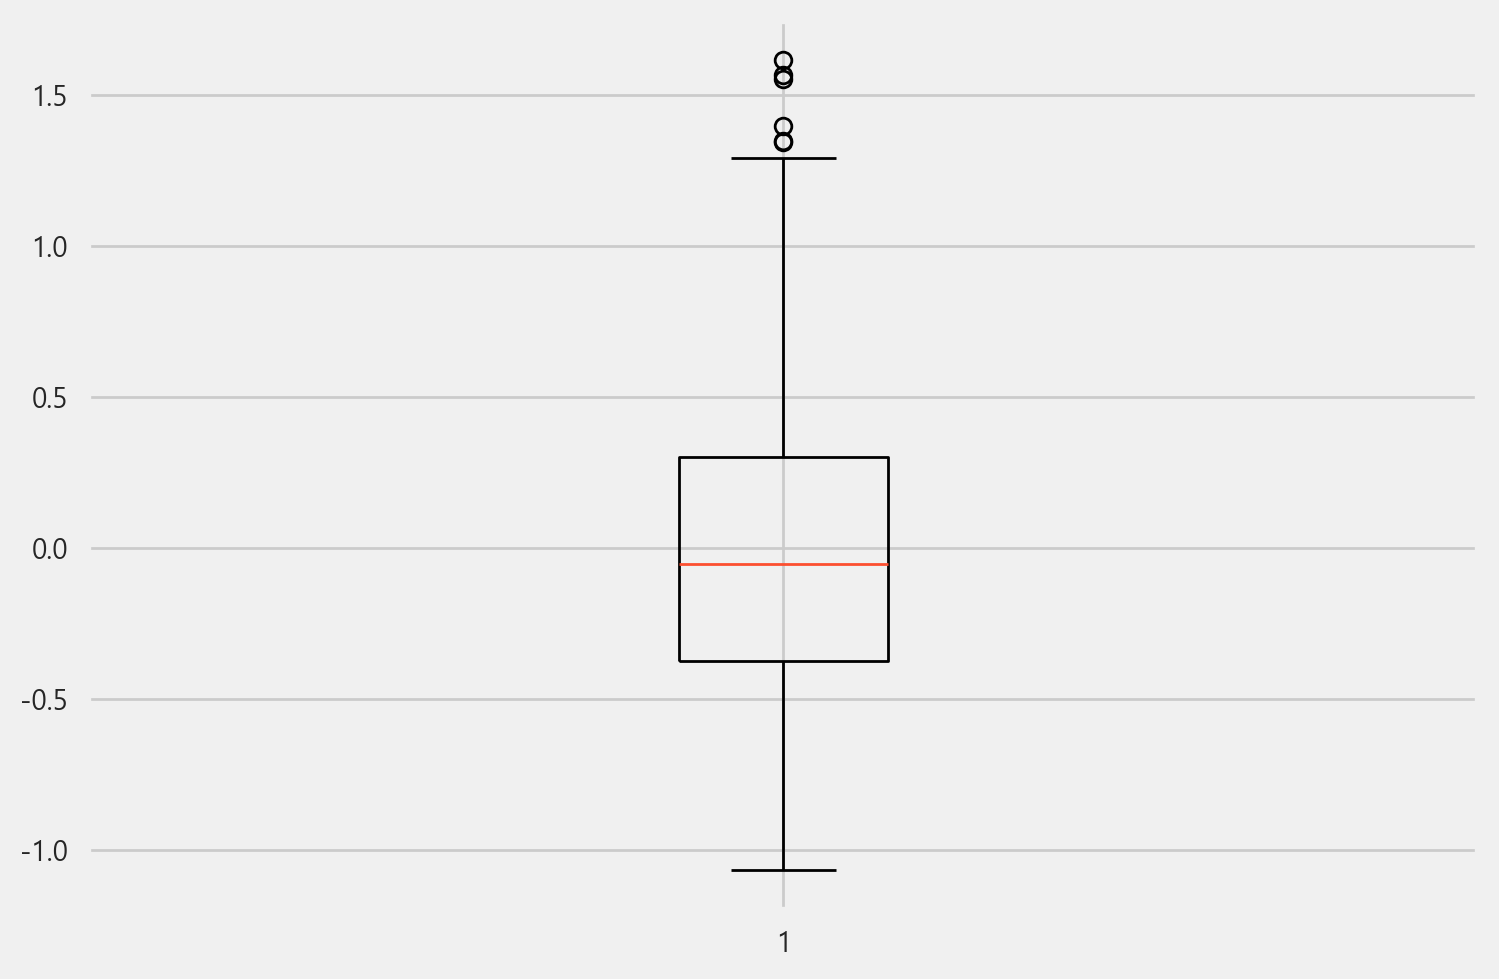

In [126]:
plt.boxplot(pca_population[0])

## 차원축소 결과

In [45]:
pca_result =pd.concat([pca_population, pca_environ, pca_market],axis=1)

In [46]:
pca_result.columns= population_column + environ_column + market_column
pca_result.index = data.index
pca_result.head()

,연령대가 다양한 거주지역,1인 세대 및 20~30대 남녀가 많은 지역,어린이 및 청년 세대가 많은 지역,도시농업 체험이 많은 지역,공기질 오염이 심한 지역,공원 및 녹지가 많은 지역,사업체 및 카페가 많은 지역,초등학교 및 유치원이 많은 지역,채소 가게가 많은 지역,상가 매출이 많은 지역,유동인구가 적은 지역
가락1동,0.313616,-0.374014,0.304799,-0.120876,-0.018799,0.014190,-0.015452,-0.036871,0.411381,0.423578,0.161925
가락2동,0.534889,-0.245001,0.231403,-0.026843,-0.085661,0.358427,-0.037480,0.202092,0.005745,-0.060841,0.129672
가락본동,0.219057,0.031534,0.091975,-0.050207,-0.034857,0.250038,0.348872,0.004524,0.309610,-0.071224,0.159436
가리봉동,-0.897454,0.115215,-0.021856,-0.202491,0.015064,-0.293633,-0.244115,-0.223236,0.172398,-0.092865,-0.091253
가산동,0.167886,0.880424,0.350236,-0.135783,0.121203,-0.105829,1.612191,-0.262219,0.046416,0.044967,0.213595


In [47]:
data_kind = 'winsorized_outlier_merged_age_merged_kinder'

In [48]:
pca_result.to_csv(f'./data_to_model/data_after_pca_with_{data_kind}_{scale_kind}_scaled_{len(pca_result.columns)}_features.csv')

---
clustering

In [50]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
plt.style.use('fivethirtyeight')

# 통계분석
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# 차원축소
from sklearn.preprocessing import *
from sklearn.decomposition import TruncatedSVD, PCA

# 군집화
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster 
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster import KElbowVisualizer

# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings('ignore')

import os

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [51]:
def silhouette_avg(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    return cluster_labels, yticks, silhoutte_avg

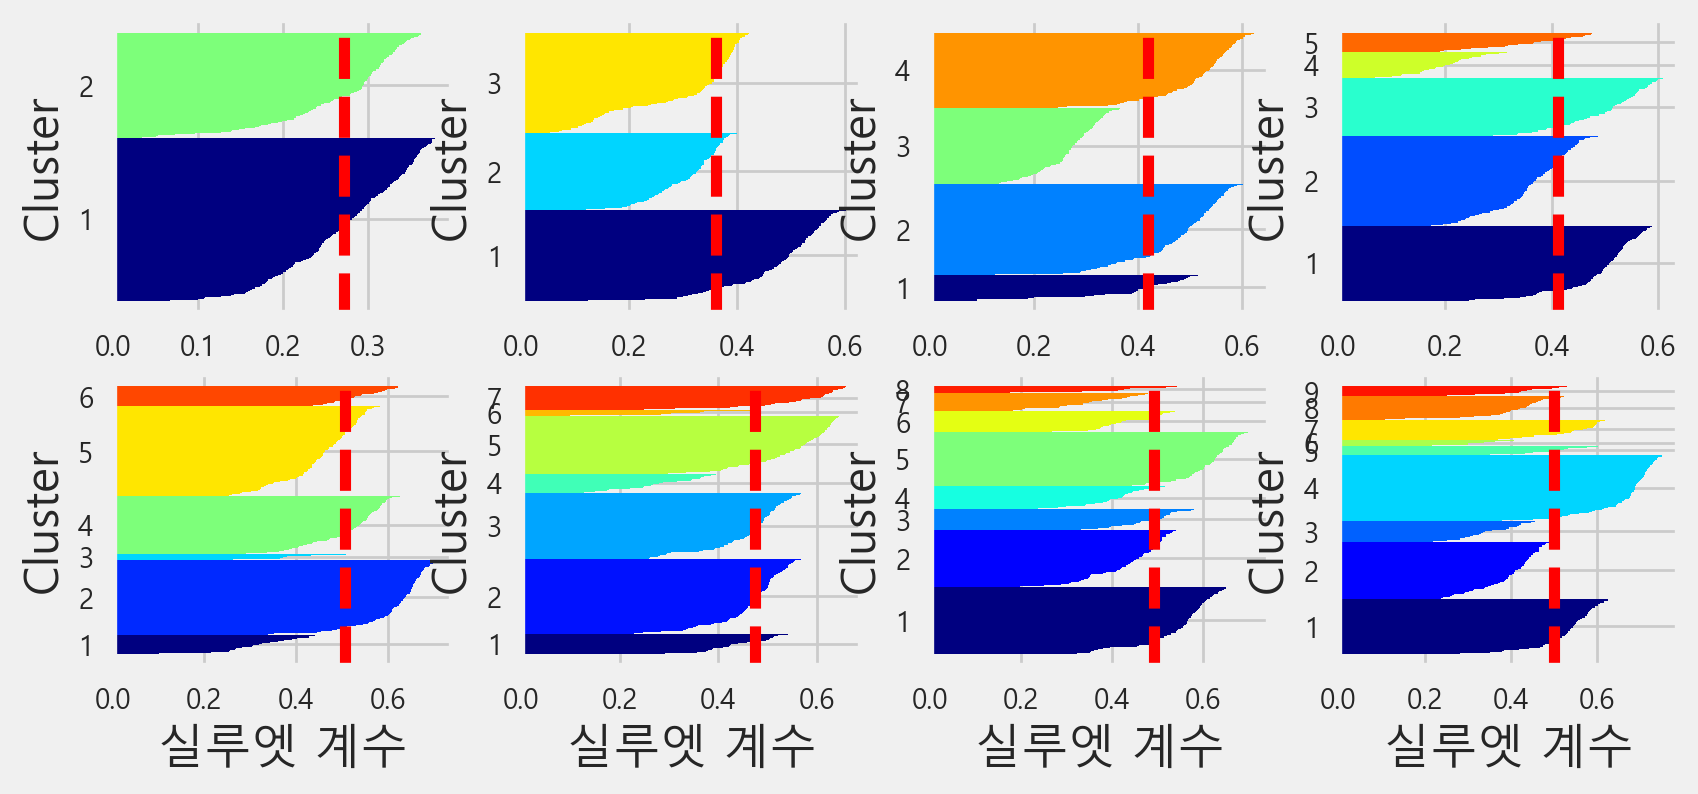

In [53]:
# 군집의 개수를 2~9까지 바꿔가며 최적의 군집 개수를 선택한다.
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

nrows, ncols = 2, 4
fig, ax = plt.subplots(nrows=nrows,
                       ncols=ncols,
                       figsize=(9,4))
for i, n_cluster in enumerate(n_clusters):
    kmeans = KMeans(n_clusters=n_cluster,
                    init='k-means++',
                    max_iter=300,
                    random_state=0)
    kmeans.fit(pca_result)

    
    plt.subplot(nrows, ncols, i+1)
    pca_result['cluster'] = kmeans.labels_
    cluster_labels, yticks, silhoutte_score = silhouette_avg(pca_result, kmeans.labels_)
    
    plt.axvline(silhoutte_score, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('Cluster')
    plt.xlabel('실루엣 계수')
plt.show()

In [56]:
kmeans = KMeans(n_clusters=5,
                init='k-means++',
                max_iter=300,
                random_state=0)
kmeans.fit(pca_result)

pca_result['cluster'] = kmeans.labels_

In [57]:
# 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(pca_result.iloc[:,:-1], pca_result['cluster'])
print('silhouette_samples() return 값의 shape: ' , score_samples.shape)

# 실루엣 계수 컬럼 추가
pca_result['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(pca_result.iloc[:,:-2], pca_result['cluster'])
print('Data의 그룹별 Silhouette Analysis Score:  {0:.3f}'.format(average_score))

print(pca_result.groupby('cluster')['silhouette_coeff'].mean())

silhouette_samples() return 값의 shape:  (426,)
Data의 그룹별 Silhouette Analysis Score:  0.053
cluster
0    0.452577
1    0.527653
2    0.116604
3    0.433128
4    0.319766
Name: silhouette_coeff, dtype: float64


In [119]:
pca_result

,연령대가 다양한 거주지역,1인 세대 및 20~30대 남녀가 많은 지역,어린이 및 청년 세대가 많은 지역,도시농업 체험이 많은 지역,공기질 오염이 심한 지역,공원 및 녹지가 많은 지역,사업체 및 카페가 많은 지역,초등학교 및 유치원이 많은 지역,채소 가게가 많은 지역,상가 매출이 많은 지역,유동인구가 적은 지역,cluster,silhouette_coeff,score
가락1동,0.313616,-0.374014,0.304799,-0.120876,-0.018799,0.014190,-0.015452,-0.036871,0.411381,0.423578,0.161925,3,0.367507,3.739626
가락2동,0.534889,-0.245001,0.231403,-0.026843,-0.085661,0.358427,-0.037480,0.202092,0.005745,-0.060841,0.129672,3,0.520653,3.747057
가락본동,0.219057,0.031534,0.091975,-0.050207,-0.034857,0.250038,0.348872,0.004524,0.309610,-0.071224,0.159436,3,0.373895,3.939887
가리봉동,-0.897454,0.115215,-0.021856,-0.202491,0.015064,-0.293633,-0.244115,-0.223236,0.172398,-0.092865,-0.091253,0,0.500505,-1.581719
가산동,0.167886,0.880424,0.350236,-0.135783,0.121203,-0.105829,1.612191,-0.262219,0.046416,0.044967,0.213595,4,0.307826,6.505897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
효창동,-0.610725,-0.064066,0.090518,-0.149418,0.235483,-0.200463,-0.285619,-0.233385,-0.108534,0.114565,-0.004745,0,0.530504,-1.206900
후암동,-0.252031,0.036075,-0.010546,-0.128683,0.190395,-0.104269,-0.195403,-0.065220,-0.176473,-0.041489,0.010387,0,0.463513,-0.758032
휘경1동,-0.402415,0.147963,0.102953,-0.218452,-0.100298,-0.309119,-0.099845,-0.210587,-0.180146,-0.009367,-0.191145,0,0.472797,-1.088170
휘경2동,0.230484,0.193280,0.058756,-0.148109,-0.194280,-0.022216,-0.109277,0.111805,-0.128863,-0.119899,0.009802,3,0.430953,2.861879


In [111]:
pca_resulta.columns

Index(['연령대가 다양한 거주지역', '1인 세대 및 20~30대 남녀가 많은 지역', '어린이 및 청년 세대가 많은 지역',
       '도시농업 체험이 많은 지역', '공기질 오염이 심한 지역', '공원 및 녹지가 많은 지역', '사업체 및 카페가 많은 지역',
       '초등학교 및 유치원이 많은 지역', '채소 가게가 많은 지역', '상가 매출이 많은 지역', '유동인구가 적은 지역',
       'cluster', 'silhouette_coeff', 'score'],
      dtype='object')

<Axes: >

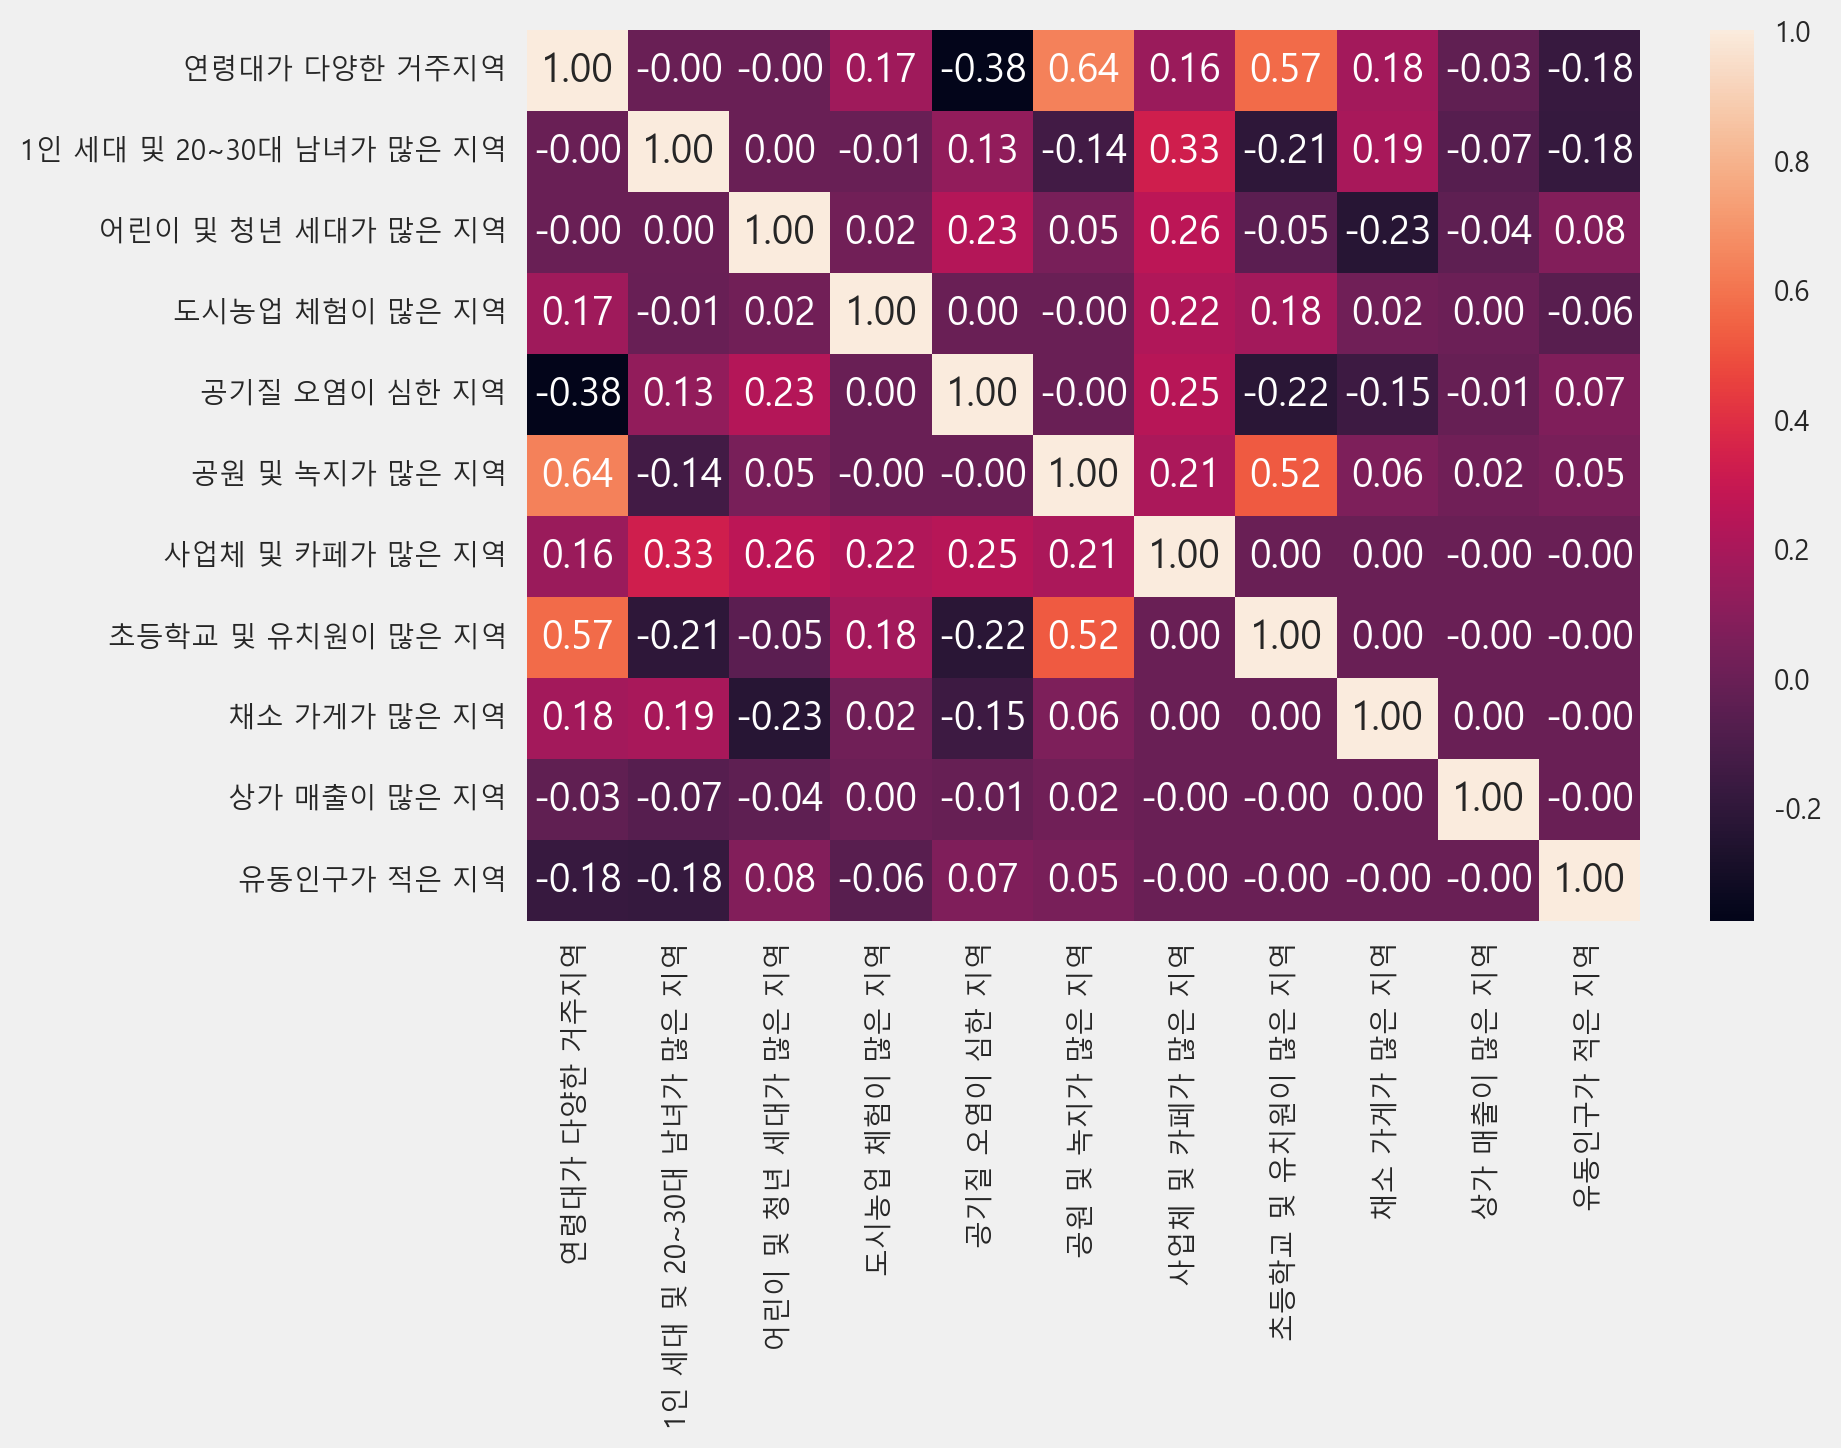

In [118]:
sns.heatmap(pca_result.drop(columns = ['cluster', 'silhouette_coeff', 'score']).corr(), annot=True, fmt = '.2f')

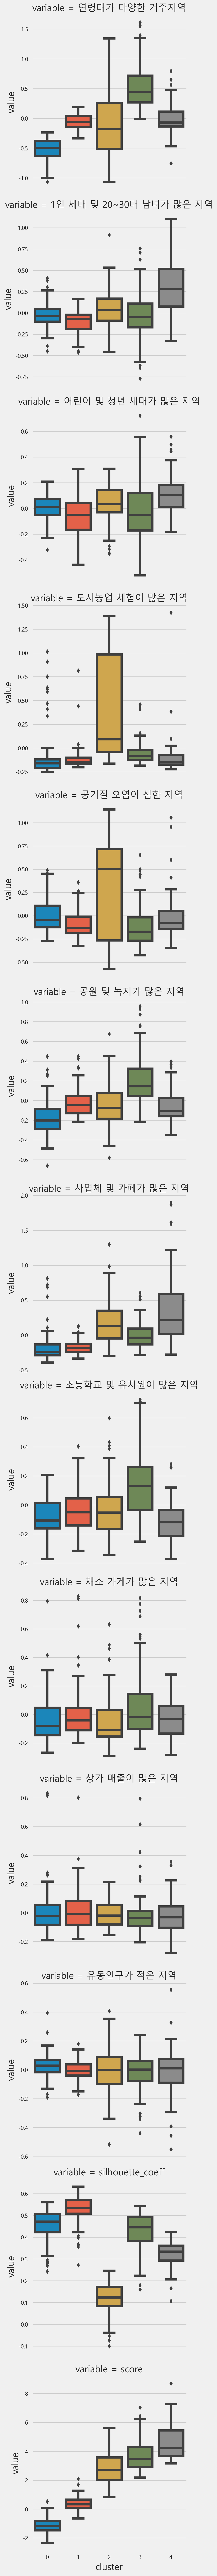

In [107]:
sns.catplot(data = pca_result.melt('cluster'), x = 'cluster', y = 'value', row = 'variable', kind = 'box', sharey = False)

In [68]:
pca_result[['cluster', 'silhouette_coeff']]

,cluster,silhouette_coeff
가락1동,3,0.367507
가락2동,3,0.520653
가락본동,3,0.373895
가리봉동,0,0.500505
가산동,4,0.307826
...,...,...
효창동,0,0.530504
후암동,0,0.463513
휘경1동,0,0.472797
휘경2동,3,0.430953


In [84]:
# score 구하기_ 유동인구가 적은 지역의 부호 바꾸기 
pca_result['score'] = 0
for col in pca_result.columns[:-2]:
    if col == '유동인구가 적은 지역':
        pca_result['score'] -= pca_result[col]

    else:
        pca_result['score'] += pca_result[col]

In [93]:
pca_result[pca_result['cluster'] == 0].sort_values(by='score', ascending=False).head(2)

,연령대가 다양한 거주지역,1인 세대 및 20~30대 남녀가 많은 지역,어린이 및 청년 세대가 많은 지역,도시농업 체험이 많은 지역,공기질 오염이 심한 지역,공원 및 녹지가 많은 지역,사업체 및 카페가 많은 지역,초등학교 및 유치원이 많은 지역,채소 가게가 많은 지역,상가 매출이 많은 지역,유동인구가 적은 지역,cluster,silhouette_coeff,score
중앙동,-0.307701,0.410062,0.095990,-0.161211,0.140477,-0.203856,-0.084384,-0.081369,-0.126260,0.832866,-0.005181,0,0.268570,0.519795
구로4동,-0.530243,0.146077,-0.230218,-0.142492,-0.076085,-0.041571,0.016988,-0.023859,0.794831,0.161015,-0.024306,0,0.278527,0.098750


In [94]:
pca_result[pca_result['cluster'] == 1].sort_values(by='score', ascending=False).head(2)

,연령대가 다양한 거주지역,1인 세대 및 20~30대 남녀가 많은 지역,어린이 및 청년 세대가 많은 지역,도시농업 체험이 많은 지역,공기질 오염이 심한 지역,공원 및 녹지가 많은 지역,사업체 및 카페가 많은 지역,초등학교 및 유치원이 많은 지역,채소 가게가 많은 지역,상가 매출이 많은 지역,유동인구가 적은 지역,cluster,silhouette_coeff,score
강일동,-0.224784,-0.176085,0.083451,0.812760,0.035698,0.256430,-0.158674,0.321625,-0.017982,0.204823,0.049646,1,0.271799,2.087615
개포2동,-0.129138,-0.281858,0.258731,0.037464,0.248590,0.424481,-0.160009,0.233354,-0.066279,0.103026,-0.017114,1,0.405923,1.685476


In [95]:
pca_result[pca_result['cluster'] == 2].sort_values(by='score', ascending=False).head(2)

,연령대가 다양한 거주지역,1인 세대 및 20~30대 남녀가 많은 지역,어린이 및 청년 세대가 많은 지역,도시농업 체험이 많은 지역,공기질 오염이 심한 지역,공원 및 녹지가 많은 지역,사업체 및 카페가 많은 지역,초등학교 및 유치원이 많은 지역,채소 가게가 많은 지역,상가 매출이 많은 지역,유동인구가 적은 지역,cluster,silhouette_coeff,score
독산1동,1.344328,0.506369,0.309316,1.083237,-0.464289,0.045984,0.320124,0.432605,-0.028219,-0.064457,-0.113792,2,-0.038352,5.598789
성산2동,1.073562,0.227766,0.053104,0.630548,-0.023052,0.453083,0.127570,0.323907,0.461369,0.093998,0.040903,2,-0.100203,5.380950


In [96]:
pca_result[pca_result['cluster'] == 3].sort_values(by='score', ascending=False).head(2)

,연령대가 다양한 거주지역,1인 세대 및 20~30대 남녀가 많은 지역,어린이 및 청년 세대가 많은 지역,도시농업 체험이 많은 지역,공기질 오염이 심한 지역,공원 및 녹지가 많은 지역,사업체 및 카페가 많은 지역,초등학교 및 유치원이 많은 지역,채소 가게가 많은 지역,상가 매출이 많은 지역,유동인구가 적은 지역,cluster,silhouette_coeff,score
진관동,1.614522,-0.331091,0.117861,0.132368,-0.118388,0.929583,0.533366,0.712779,-0.203792,0.616210,-0.027910,3,0.304982,7.031327
양재1동,1.279299,-0.266874,0.047825,0.157848,0.004110,0.958269,0.553287,0.725568,-0.116447,-0.064116,-0.156694,3,0.344645,6.435462


In [97]:
pca_result[pca_result['cluster'] == 4].sort_values(by='score', ascending=False).head(2)

,연령대가 다양한 거주지역,1인 세대 및 20~30대 남녀가 많은 지역,어린이 및 청년 세대가 많은 지역,도시농업 체험이 많은 지역,공기질 오염이 심한 지역,공원 및 녹지가 많은 지역,사업체 및 카페가 많은 지역,초등학교 및 유치원이 많은 지역,채소 가게가 많은 지역,상가 매출이 많은 지역,유동인구가 적은 지역,cluster,silhouette_coeff,score
영등포동,0.475399,0.977516,0.444412,0.097097,1.055651,0.220842,1.146124,0.080528,0.015680,0.013403,-0.169928,4,0.216097,8.696578
신촌동,-0.065065,0.747076,0.374894,-0.036421,0.599608,0.006406,1.197486,0.256707,-0.099114,-0.116215,-0.392026,4,0.304129,7.257389
